**Sentiment Analysis:**
Sentiment Analysis is the process of determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker

In [4]:
#Importing necessary packages for analysis


import numpy as np 
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [5]:
#getting data into dataframe
train = pd.read_csv('train.csv')
train = train[['tweet','label']]
test_data=pd.read_csv('test.csv')
train.head()

,tweet,label
0,b'oh yea that makes sense ',sarcastic
1,Estas enfermedad a un cargo poltico tu como pb...,sarcastic
2,@alleygirl2409 until i\'m and all the old men ...,sarcastic
3,"b""@sarinas it had been chanted peacefully you ...",sarcastic
4,"b""there's nothing like being on vacation and h...",sarcastic


Using wordcloud visualisation technique to visualise data

Sarcastic words


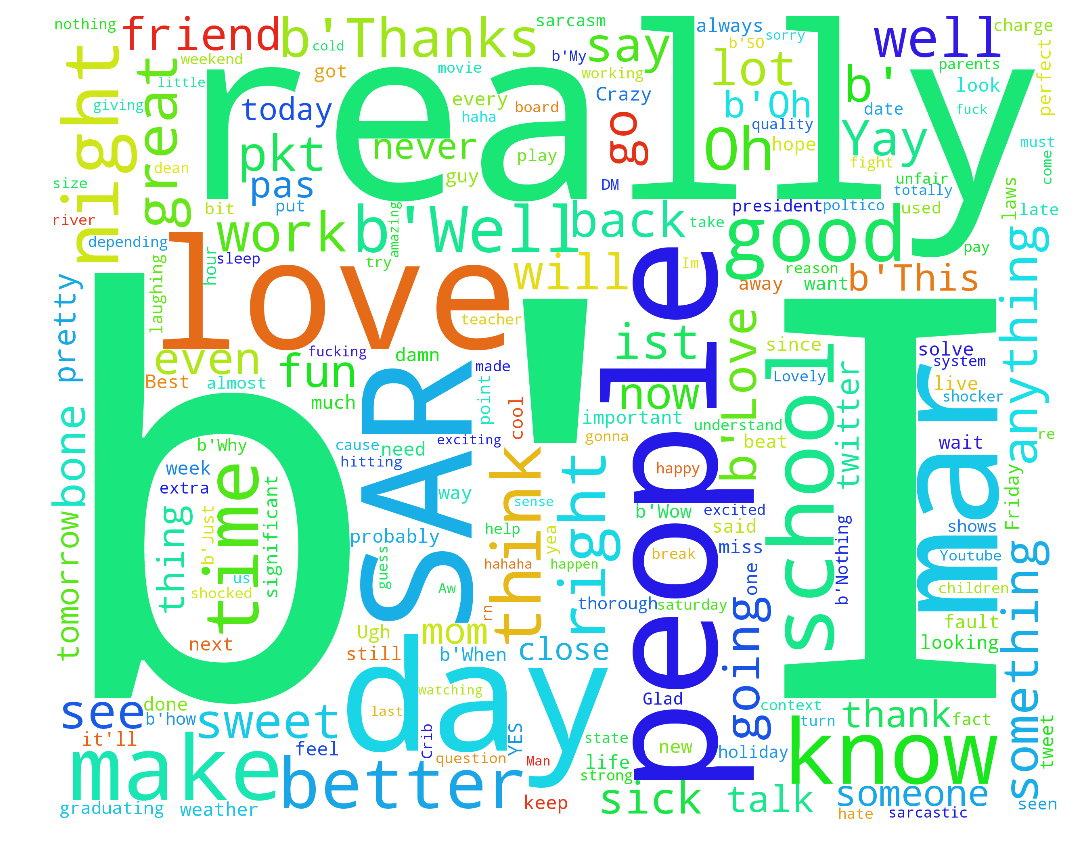

Non Sarcastic words


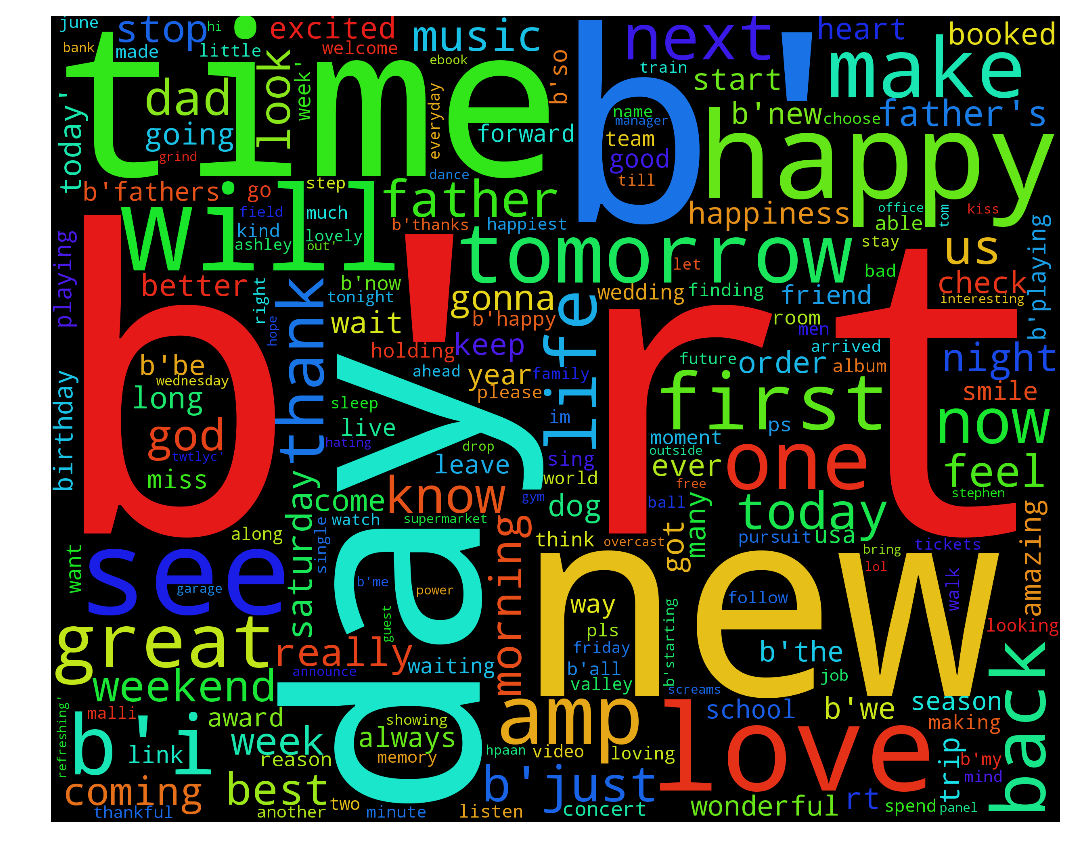

In [6]:
train_sarcastic = train[ train['label'] == 'sarcastic']
train_sarcastic = train_sarcastic['tweet']
train_non_sarcastic = train[ train['label'] == 'non-sarcastic']
train_non_sarcastic = train_non_sarcastic['tweet']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Sarcastic words")
wordcloud_draw(train_sarcastic,'white')
print("Non Sarcastic words")
wordcloud_draw(train_non_sarcastic)

Sarcastic wordset includes words like: 
**really**,**school**,**time**,**people**,**mar**, **time**, **good**,  **together**, **love**, **job**
Non Sarcastic wordset includes words like:
**day**, **time**, **tomorrow**, **happy**, **amazing**, **night**, **know**

In [7]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_cleaned,row.label))


In [8]:
test=[]
stopwords_set = set(stopwords.words("english"))

for index, row in test_data.iterrows():
    words_filtered = [e.lower() for e in row.tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    test.append((words_cleaned))

In [9]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

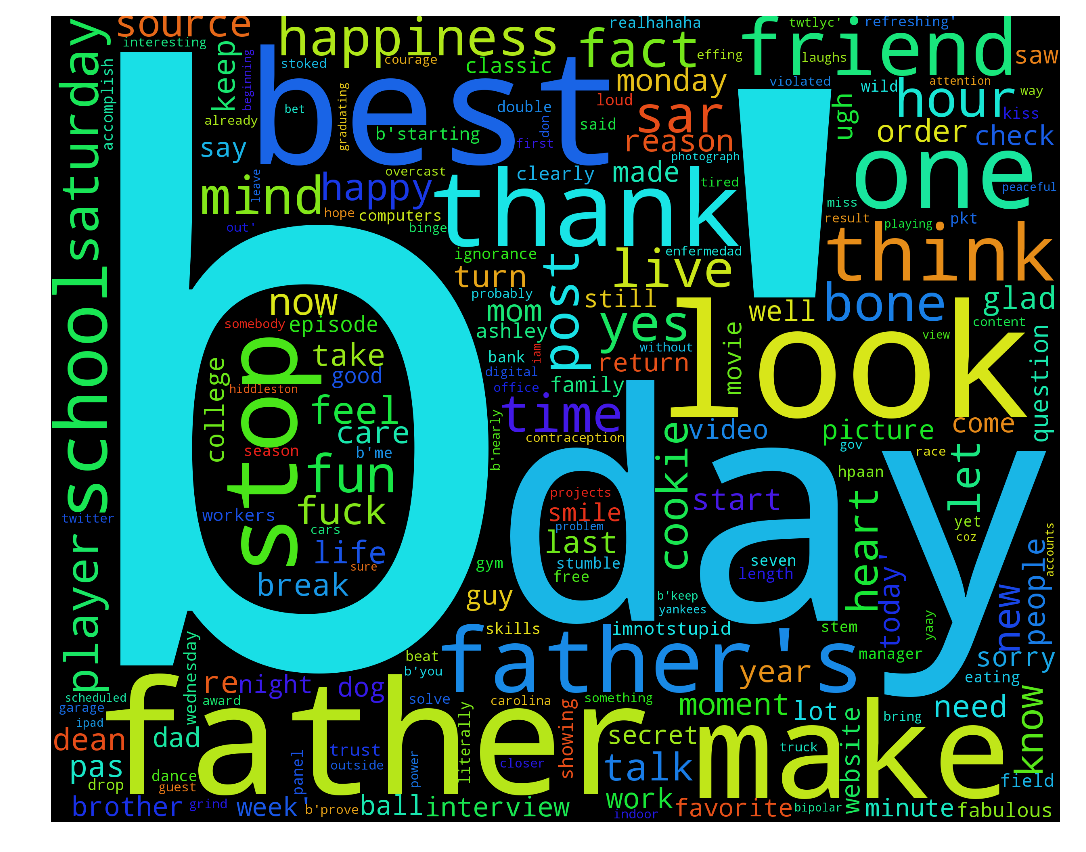

In [10]:
wordcloud_draw(w_features)

Using the nltk NaiveBayes Classifier I classified the extracted tweet word features.

In [11]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

Predicting values for the test dataset

In [13]:
pred=[]

for obj in test: 
    res =  classifier.classify(extract_features(obj))
    pred.append(res)
print(pred)        

['non-sarcastic', 'sarcastic', 'sarcastic', 'non-sarcastic', 'non-sarcastic', 'non-sarcastic', 'non-sarcastic', 'non-sarcastic', 'non-sarcastic', 'non-sarcastic', 'sarcastic', 'sarcastic', 'sarcastic', 'non-sarcastic', 'non-sarcastic', 'non-sarcastic', 'non-sarcastic', 'non-sarcastic', 'sarcastic', 'sarcastic', 'sarcastic', 'sarcastic', 'sarcastic', 'non-sarcastic', 'non-sarcastic', 'non-sarcastic', 'sarcastic', 'sarcastic', 'sarcastic', 'non-sarcastic', 'sarcastic', 'non-sarcastic', 'non-sarcastic', 'sarcastic', 'non-sarcastic', 'non-sarcastic', 'sarcastic', 'sarcastic', 'sarcastic', 'non-sarcastic', 'non-sarcastic', 'sarcastic', 'sarcastic', 'sarcastic', 'sarcastic', 'sarcastic', 'non-sarcastic', 'non-sarcastic', 'non-sarcastic', 'sarcastic', 'non-sarcastic', 'sarcastic', 'sarcastic', 'sarcastic', 'non-sarcastic', 'sarcastic', 'non-sarcastic', 'sarcastic', 'sarcastic', 'non-sarcastic', 'non-sarcastic', 'non-sarcastic', 'non-sarcastic', 'sarcastic', 'sarcastic', 'sarcastic', 'non-sarc

Printing data to file 

In [15]:
output = pd.DataFrame(data = {"ID": test_data.ID, "label": pred})
output.to_csv("submission.csv",index=False)